<a href="https://colab.research.google.com/github/Toan211/CS114/blob/master/18521503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#P1


In [ ]:
import os
import numpy as np

In [ ]:
path_dir ='/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2'
labels = os.listdir(path_dir +"/training")

def LoadData(path):
  X,Y = [], []
  for label_i in labels:
    lb_path = path_dir + '/' + path + label_i + '/'
    for file in os.listdir(lb_path):
      f = lb_path + file
      print(f)
      X.append(np.load(f))
      Y.append(label_i)
  print(f' {label_i} Loading comoleted')
  return X,Y

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

### LOAD_DATA

In [ ]:
trainX, trainY = LoadData('training/')

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/685.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/1220.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/1005.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/197.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/301.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/692.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/79.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/28.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/744.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/909.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/training/Meat/316.npy
/content/drive

In [ ]:
testX, testY = LoadData('evaluation/')

/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/122.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/297.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/161.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/195.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/214.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/181.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/2.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/205.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/361.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/178.npy
/content/drive/My Drive/subjects/ML/Food-11/features/VGG16_fc2/evaluation/Bread/198.npy
/content/drive/My Drive/subjects/M

## OVR

In [ ]:
# SVC (OVR)
model_ovr = SVC(decision_function_shape='ovr')
model_ovr.fit(trainX, trainY)
Y_pred1 = model_ovr.predict(testX)
precision1 = metrics.accuracy_score(Y_pred1, testY)


In [ ]:
print("Accuracy with OvR(non_linear): {0:.2f}%".format(precision1*100))

Accuracy with OvR(non_linear): 85.57%


In [ ]:
print('support vector OVR',model_ovr.support_vectors_.shape)

support vector OVR (6262, 4096)


## OVO

In [ ]:
# SVC (OVO)
model_ovo = SVC(decision_function_shape ='ovo')
model_ovo.fit(trainX, trainY)
Y_pred2 = model_ovo.predict(testX) 
precision2 = metrics.accuracy_score(Y_pred2, testY)


In [ ]:
print("Accuracy with OvO: {0:.2f}%".format(precision2*100))

Accuracy with OvO: 85.57%


In [ ]:
print('support vector OVO',model_ovo.support_vectors_.shape)

support vector OVO (6262, 4096)


## LINEAR_SVC

In [ ]:
#Linear SVC

model_linear = LinearSVC()
model_linear.fit(trainX, trainY)
Y_pred3 = model_linear.predict(testX) 
precision3 = metrics.accuracy_score(Y_pred3, testY)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print("Accuracy with linear SVC: {0:.2f}%".format(precision3*100))

Accuracy with linear SVC: 82.25%


In [ ]:
print('support_vector Linear SVC',model_linear.coef_.shape)

support_vector Linear SVC (11, 4096)


## RESULT

In [ ]:
#                       SVC(ovr)                 SVC(ovo)               LinearSVC
# Accuracy              85,57%                    85.57%                    82.25%
# support vector       (6262, 4096)             (6262, 4096)            (11, 4096)

#P2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN=KNeighborsClassifier()
KNN.fit(trainX,trainY)
print("Accuracy of KNN =",KNN.score(testX,testY))

Accuracy of KNN = 0.7672542575440693


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()
NB.fit(trainX,trainY)
print("Accuracy of Naive Bayes=",NB.score(testX,testY))

Accuracy of Naive Bayes= 0.6656707499253063


In [ ]:
from sklearn.cluster import KMeans

In [ ]:

n_labels = len(labels)
kmeans = KMeans(n_clusters=n_labels)
kmeans_pred = kmeans.fit_predict(testX)
print("Các Centers cho từng class:",kmeans.cluster_centers_)

Các Centers cho từng class: [[0.14759431 2.62318456 0.29428859 ... 0.06761087 1.60671455 0.01097746]
 [0.00414654 0.29518213 0.29298979 ... 0.35372115 0.04773318 0.01222005]
 [0.17275526 0.33851259 0.36920423 ... 0.69909821 0.51423531 0.25273977]
 ...
 [0.18700119 0.65645853 0.22862351 ... 1.07574612 0.22463148 0.05632951]
 [0.00919062 0.08286341 0.20563711 ... 0.43548479 0.36497847 0.01663201]
 [0.26310794 0.15407742 0.30010296 ... 1.56580121 0.05030827 0.19918529]]


#P3

In [ ]:
Path_dir = '/content/drive/My Drive/subjects/ML/Food-11/img/'
path_train = Path_dir + 'training/'
path_test = Path_dir + 'evaluation/'
path_valid = Path_dir + 'validation/'


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
import numpy as np

In [ ]:
classname = os.listdir(path_test)
X_train, y_train, X_test, y_test, X_valid, y_valid = [],[],[],[],[],[]

In [ ]:
def loadData(X,Y, path):
  for folder_name in classname:
    i = 0
    folder_path = os.path.join(path, folder_name)
    for fname in os.listdir(folder_path):
      if i < 800:
        fpath = os.path.join(folder_path, fname)
        print(fpath)
        img = image.load_img(fpath, target_size=(224,224))
        img_data = image.img_to_array(img)
        X.append(img_data)
        Y.append(folder_name)
        i = i + 1
      else:
        print(i)
        break;
  print('Loading completed.')

In [ ]:
loadData(X_train,y_train,path_train)

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/158.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/299.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/157.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/1324.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/218.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/460.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/17.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/1306.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/374.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/37.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/145.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/345.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/training/Meat/232.jpg
/content/drive/My Drive/subjects/ML/Foo

In [ ]:
loadData(X_valid, y_valid, path_valid)

/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/101.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/139.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/354.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/111.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/338.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/146.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/127.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/100.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/322.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/268.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/205.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/106.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/validation/Dessert/2.jpg
/content/drive/My Drive/sub

In [ ]:
X_train = np.asarray(X_train)
X_valid = np.asarray(X_valid)

In [ ]:
import matplotlib.pyplot as plt

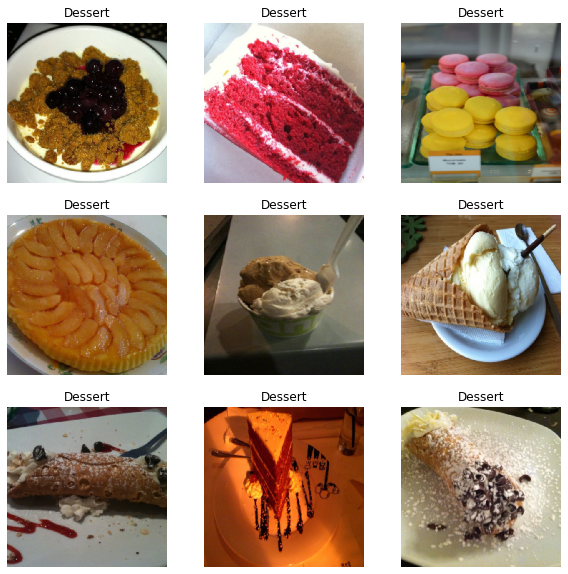

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[i+5].astype('uint8'))
  plt.title(y_train[i+5])
  plt.axis('off')

In [ ]:
# from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
# Scale up with Min-Max-Scaling
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [ ]:
# One hot encoding
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_valid = lb.fit_transform(y_valid)

In [ ]:
# (include_top = False) == Not using Fully Connected
model = Sequential()
model_mobile = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False, weights='imagenet')

model.add(model_mobile)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
# Fully Connected
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(11)) # 11 is number of labels
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               32113152  
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 11)                5643      
_________________________________________________________________
activation_1 (Activation)    (None, 11)                0

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18,zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
learning_rate = 0.01
epochs = 10
batch_size = 64
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print('Start training')
H = model.fit(aug.flow(X_train,y_train,batch_size=batch_size), validation_data=(X_valid,y_valid), steps_per_epoch=X_train.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10
116/116 [==============================] - 1605s 14s/step - loss: 2.6920 - accuracy: 0.1273 - val_loss: 7.3197 - val_accuracy: 0.0079
Epoch 2/10
116/116 [==============================] - 1750s 15s/step - loss: 2.3689 - accuracy: 0.1719 - val_loss: 7.4721 - val_accuracy: 0.0489
Epoch 3/10
116/116 [==============================] - 1817s 16s/step - loss: 2.1671 - accuracy: 0.2253 - val_loss: 17.2809 - val_accuracy: 0.0079
Epoch 4/10
116/116 [==============================] - 1748s 15s/step - loss: 2.0672 - accuracy: 0.2583 - val_loss: 5.7133 - val_accuracy: 0.0079
Epoch 5/10
116/116 [==============================] - 1790s 15s/step - loss: 2.1925 - accuracy: 0.2113 - val_loss: 6.4063 - val_accuracy: 0.0299
Epoch 6/10
116/116 [==============================] - 1750s 15s/step - loss: 1.9552 - accuracy: 0.2935 - val_loss: 5.3384 - val_accuracy: 0.0378
Epoch 7/10
116/116 [==============================] - 1743s 15s/step - loss: 1.8357 - accuracy: 0.3297 - val_loss:

In [ ]:
model.save('MobilenetV2.h5')

In [ ]:
 loadData(X_test, y_test, path_test)
 X_test = X_test / 255.0
 y_test = lb.fit_transform(y_test)

/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/337.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/297.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/179.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/137.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/123.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/321.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/230.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/368.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/121.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/380.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/176.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/131.jpg
/content/drive/My Drive/subjects/ML/Food-11/img/evaluation/Dessert/21.jpg
/content/drive/My Drive/su

TypeError: ignored

In [ ]:
result = model.predict(X_test[1:2])
print('Du doan: {} ------- so voi thuc te: {}'.format(result,y_test[1]))
restore_img = X_test[1] * 255
restore_img = restore_img.astype('int')
plt.imshow(restore_img)

In [ ]:
result = model.predict(X_test[1:2])
print('Du doan: {} ------- so voi thuc te: {}'.format(result,y_test[1]))
restore_img = X_test[50] * 255
restore_img = restore_img.astype('int')
plt.imshow(restore_img)

In [ ]:
result = model.predict(X_test[1:2])
print('Du doan: {} ------- so voi thuc te: {}'.format(result,y_test[1]))
restore_img = X_test[100] * 255
restore_img = restore_img.astype('int')
plt.imshow(restore_img)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Predict all data from testset
y_pred = model.predict_generator(X_test)

# Convert One hot to Label
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.astype('str')
for i in range(y_pred.shape[0]):
  y_pred[i] = classNames[int(y_pred[i])]


print('Confusion Matrix')
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names= classname))